<a href="https://colab.research.google.com/github/harry-zhao78/colab/blob/master/keran's_trade_stement_changed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyfolio
import pyfolio as pf
import matplotlib.pyplot as plt
import empyrical
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files



Saving test.csv to test.csv


In [ ]:
uploaded = files.upload()

Saving test.csv to test (5).csv


In [ ]:

#df1 = pd.read_csv("trading statement.csv")
df1 = pd.read_csv("test.csv")

df2=df1
df2

,Transaction Date,Stock Code,Name of Stock,Type of Transaction,Transaction Price,Volume of Trade,Number of Shares in Account,Transaction Amount,Comission fee + Transcation Amount,Remaining Cash in Account
0,20160112,600528,中铁二局,Buy,14.11,400,400,5644.0,-5649.11,13560.66
1,20160112,601198,东兴证券,Buy,27.39,200,200,5478.0,-5483.11,8077.55
2,20160112,600528,中铁二局,Buy,14.01,500,900,7005.0,-7010.14,1067.41
3,20160122,600528,中铁二局,Sell,15.07,500,400,7535.0,7522.31,8589.72
4,20160122,601198,东兴证券,Sell,24.12,200,0,4824.0,4814.08,13403.80
...,...,...,...,...,...,...,...,...,...,...
169,20200409,600335,国机汽车,Sell,5.55,500,0,2775.0,2767.17,43029.81
170,20200413,600683,京投发展,Buy,4.19,1000,1000,4190.0,-4195.08,38834.73
171,20200413,2444,巨星科技,Buy,10.56,2000,2000,21120.0,-21126.34,17708.39
172,20200424,600683,京投发展,Sell,3.87,1000,0,3870.0,3861.05,21569.44


In [ ]:
df2[(df2["Type of Transaction"]!="Buy") & ( df2["Type of Transaction"]!="Sell")]
a=df2.drop(index=109)
a.index
b=a.reset_index()
df=b.drop(columns="index")

In [ ]:
stock_list=df[" Name of Stock"].unique()

#df["buy port"] = [{} for _ in range(len(df))]
df["port_value"] = ""
df["account_value"] = ""

a={}
port_value=0
for index, row in df.iterrows():
  
  a[row[" Name of Stock"]]=[row["Number of Shares in Account"],row["Transaction Price"]]
  #print(a)
  port_value=0
  for key, value in a.items():
    
    port_value=port_value+value[0]*value[1]
   # print(value[0],value[1])
#  print(port_value)    

  account_value=row["Remaining Cash in Account "]+port_value

  df.loc[index,"port_value"]=port_value
  df.loc[index,"account_value"]=account_value


#df1=df.set_index("Transaction Date")
#df2=df1[["port_value","account_value"]]



#for index, row in df.iterrows():
  #df[index,"perc_returns"]=df[index,"perc_returns"]-df[index-1,"perc_returns"]

df["perc_returns"]=df.account_value.pct_change()
df2=df[["Transaction Date","port_value","account_value","perc_returns"]]

#df2.set_index("Transaction Date")
df2=df2.drop(index=0)
#df2=df2.set_index("Transaction Date")
df2[110:130]
df2.iloc[124,3]=0.0209
df2.iloc[123,3]=0.009
df2[
    df2["perc_returns"]>5
    ]
df2[110:130]

#df2=df2.drop(index=0)

df2["Transaction Date"]=df2["Transaction Date"].apply(lambda x: pd.to_datetime( str(x), format='%Y%m%d', errors='ignore'))
                                                      


df2=df2.set_index("Transaction Date")
df2


,port_value,account_value,perc_returns
Transaction Date,,,
2016-01-12,11122,19199.5,-0.000266
2016-01-12,18087,19154.4,-0.002351
2016-01-22,11506,20095.7,0.049143
2016-01-22,6028,19431.8,-0.033038
2016-01-25,2950,19295.8,-0.006999
...,...,...,...
2020-04-09,0,43029.8,0.000632
2020-04-13,4190,43024.7,-0.000118
2020-04-13,25310,43018.4,-0.000147


In [ ]:
bt_returns=df2.perc_returns
bt_returns

Transaction Date
2016-01-12   -0.000266
2016-01-12   -0.002351
2016-01-22    0.049143
2016-01-22   -0.033038
2016-01-25   -0.006999
                ...   
2020-04-09    0.000632
2020-04-13   -0.000118
2020-04-13   -0.000147
2020-04-24   -0.007647
2020-04-24   -0.041350
Name: perc_returns, Length: 172, dtype: float64

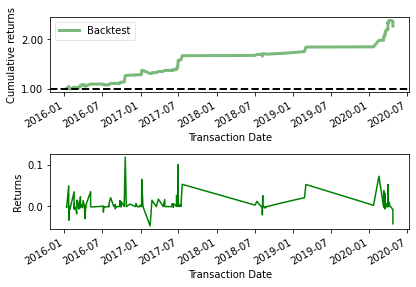

In [ ]:
# Cumulative Returns
plt.subplot(2,1,1)
pf.plotting.plot_rolling_returns(bt_returns)

# Daily, Non-Cumulative Returns
plt.subplot(2,1,2)
pf.plotting.plot_returns(bt_returns)
plt.tight_layout()


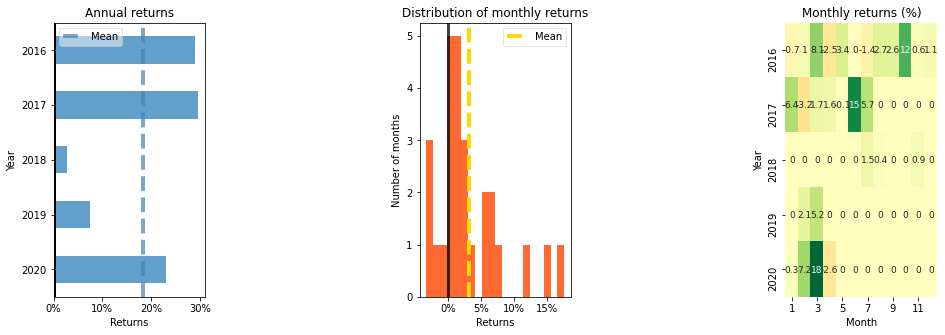

In [ ]:
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(15,5)

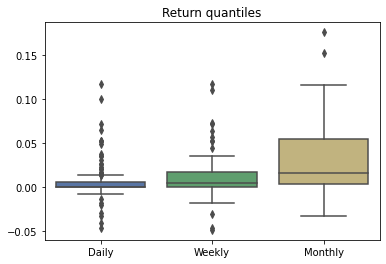

In [ ]:
pf.plot_return_quantiles(bt_returns);
